In [2]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [3]:
xls_file = pd.ExcelFile("Data_daily_final.xlsx") # Read Excel
df1=xls_file.parse("NatGas") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,TRNLTTFD1,TFMBMc3,TFMBMc6,TFMBMc9,TFMBMc12,EUR=,EUR3MV=,EUR6MV=,EUR9MV=,EUR1YV=,TRNLTTFD1 USD,TFMBMc3 USD,TFMBMc6 USD,TFMBMc9 USD,TFMBMc12 USD
Timestamp,,,,,,,,,,,,,,,
1988-06-24,NaN,NaN,NaN,NaN,NaN,1.1444,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-06-27,NaN,NaN,NaN,NaN,NaN,1.1381,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-06-28,NaN,NaN,NaN,NaN,NaN,1.1360,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-06-29,NaN,NaN,NaN,NaN,NaN,1.1403,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-06-30,NaN,NaN,NaN,NaN,NaN,1.1429,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Timestamp'>

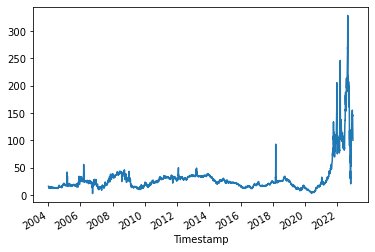

In [4]:
spot = df1["TRNLTTFD1 USD"]
spot = spot[spot != 0]

#spot = np.log(spot).diff()
spot.plot()

In [5]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    4854.000000
mean       30.323533
std        29.723381
min         3.056160
25%        16.911397
50%        23.679423
75%        32.149185
max       328.713000
Name: TRNLTTFD1 USD, dtype: float64

In [6]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 4.299569292834945
Skewness logs: 1.0008366676192897
Kurtosis spot: 25.88593600273116
Kurtosis logs: 5.7574585860463605
JB spot: Jarque_beraResult(statistic=120887.10054239012, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=2348.17791544141, pvalue=0.0)
Q(6) spot:         lb_stat  lb_pvalue
6  27270.337944        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  28044.875488        0.0


In [7]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
#print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-3.3246573064741898, 0.01381163201409025, 32, 4821, {'1%': -3.4317071427645467, '5%': -2.8621397054477846, '10%': -2.5670892247789254}, 26552.11172568047)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.955
P-value                         0.002
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  1.681
P-value                         0.000
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


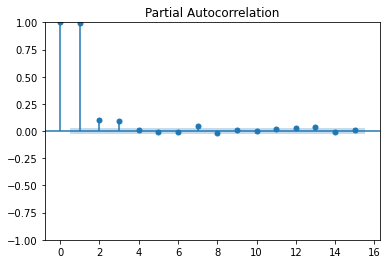

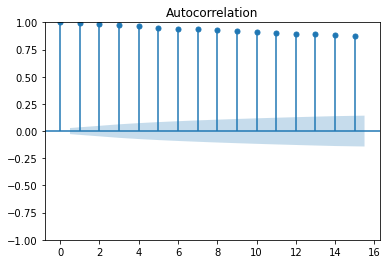

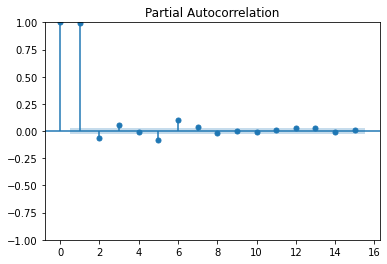

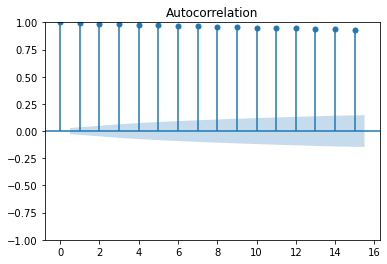

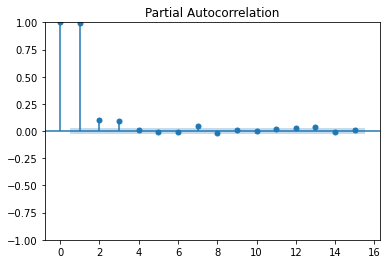

In [42]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

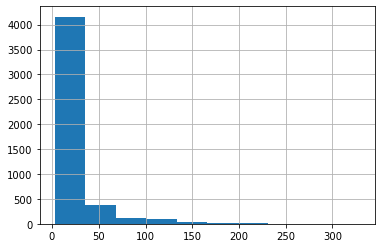

In [10]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

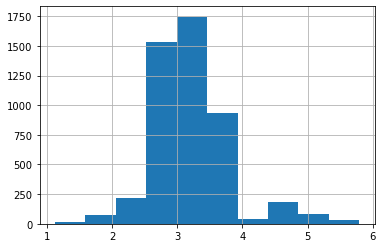

In [11]:
np.log(spot).hist()

In [25]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=3236)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11018.902, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11066.671, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11033.580, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11028.065, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11064.674, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11017.136, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11018.097, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11021.225, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11020.730, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11018.289, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11018.078, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11022.268, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11015.137, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11016.100, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0

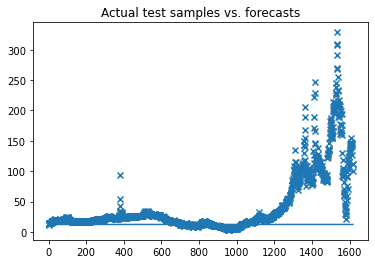

In [26]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [27]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3236
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -5503.568
Date:                Tue, 27 Dec 2022   AIC                          11015.137
Time:                        19:53:16   BIC                          11039.464
Sample:                             0   HQIC                         11023.854
                               - 3236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4212      0.071     -5.904      0.000      -0.561      -0.281
ma.L1          0.3096      0.071      4.332      0.000       0.170       0.450
ma.L2         -0.1138      0.009    -11.993      0.000      -0.132      -0.095
sigma2         1.7574      0.011    157.853      0.000       1.736       1.779
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            155808.80
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

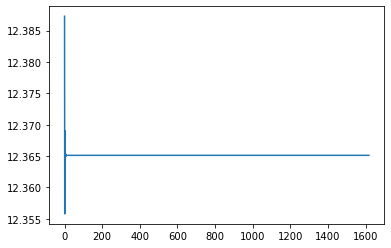

In [28]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [29]:
arima.predict(n_periods=test.shape[0])

array([12.38729012, 12.35578898, 12.3690558 , ..., 12.36512423,
       12.36512423, 12.36512423])

<AxesSubplot:xlabel='Timestamp'>

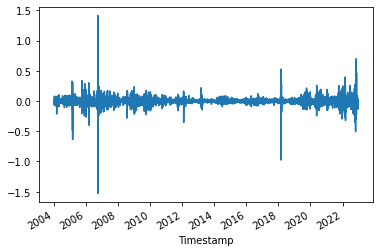

In [30]:
spot2 = np.log(spot).diff()
spot2.plot()

In [31]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    4853.000000
mean        0.000375
std         0.066369
min        -1.529909
25%        -0.019302
50%         0.000314
75%         0.020195
max         1.415573
Name: TRNLTTFD1 USD, dtype: float64

In [32]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.8786874945703735
Kurtosis spot: 124.5780559711741
JB spot: Jarque_beraResult(statistic=2989511.1012502657, pvalue=0.0)
Q(6) spot:       lb_stat     lb_pvalue
6  127.839361  3.663205e-25


In [33]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-16.851600294403873, 1.1175549826648754e-29, 21, 4831, {'1%': -3.4317043320319685, '5%': -2.862138463700832, '10%': -2.567088563745211}, -12614.737378811253)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -84.609
P-value                         0.000
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [34]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.077
P-value                         0.708
Lags                               34
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


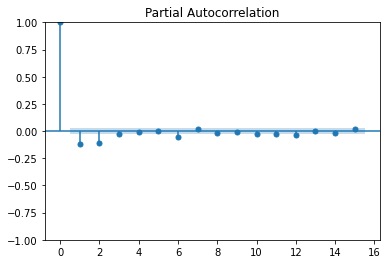

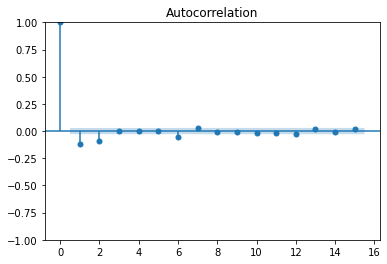

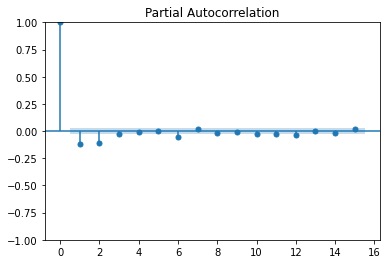

In [35]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

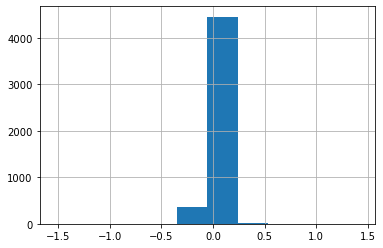

In [36]:
spot2.hist()


In [37]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=3236)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-8794.067, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8771.481, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8923.950, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8956.165, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8963.654, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8962.859, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-8980.850, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8964.806, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-8975.290, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-8963.901, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-8976.757, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8978.862, Time=0.34 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 2.849 seconds


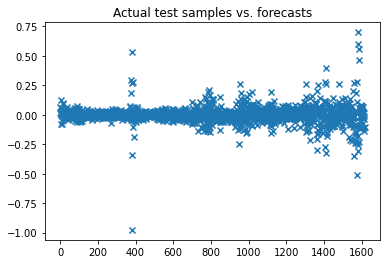

In [38]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [39]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3236
Model:               SARIMAX(1, 0, 2)   Log Likelihood                4494.425
Date:                Tue, 27 Dec 2022   AIC                          -8980.850
Time:                        19:53:34   BIC                          -8956.522
Sample:                             0   HQIC                         -8972.133
                               - 3236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8112      0.036    -22.812      0.000      -0.881      -0.742
ma.L1          0.5702      0.036     15.812      0.000       0.499       0.641
ma.L2         -0.2620      0.008    -31.604      0.000      -0.278      -0.246
sigma2         0.0036   1.31e-05    278.003      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):           3794363.98
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                            -4.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       170.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

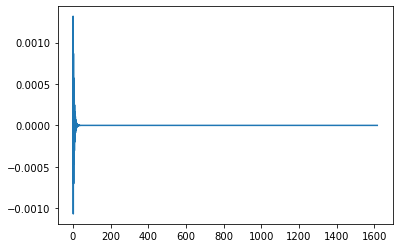

In [40]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [41]:
arima2.predict(n_periods=test2.shape[0])

array([-3.45305030e-004,  1.31915764e-003, -1.07014107e-003, ...,
       -3.71629900e-150,  3.01477555e-150, -2.44567825e-150])

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))